# 0. Import Data

In [34]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:


import pandas as pd
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv("./seattle-weather.csv")

In [37]:
df = df[~df['weather'].isin(['drizzle', 'fog'])]

weather_mapping = {'rain': 0,  'sun': 1 ,'snow': 2}
df['weather'] = df['weather'].map(weather_mapping)


In [38]:
df = df.drop(['date'], axis=1)

In [39]:
X= df.drop(['weather'], axis=1)
y= df['weather']


In [40]:
print(df.columns)

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [41]:
X


,precipitation,temp_max,temp_min,wind
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
5,2.5,4.4,2.2,2.2
...,...,...,...,...
1455,0.0,4.4,0.0,2.5
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1459,0.0,5.6,-1.0,3.4


In [43]:
y.value_counts()

weather
0    641
1    640
2     26
Name: count, dtype: int64

In [29]:
# X = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
# y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [45]:
y_train.head()

62      1
1180    1
1210    0
852     1
1055    0
Name: weather, dtype: int64

# 1. Import Dependencies

In [46]:

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'X_train' and 'y_train' contain your training features and labels
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 5 output neurons for 5 weather types with softmax activation

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)  # Adjust epochs and batch_size

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")
y_pred = model.predict(X_test)


Epoch 1/200
27/27 [==============================] - 1s 7ms/step - loss: 1.3426 - accuracy: 0.5407 - val_loss: 0.5316 - val_accuracy: 0.8278
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.8254 - val_loss: 0.4427 - val_accuracy: 0.8612
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8433 - val_loss: 0.3818 - val_accuracy: 0.8517
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8624 - val_loss: 0.3407 - val_accuracy: 0.8469
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8648 - val_loss: 0.3103 - val_accuracy: 0.8660
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8732 - val_loss: 0.2994 - val_accuracy: 0.8852
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8804 - val_loss: 0.2678 - val_accuracy: 0.8804
Epoch 8/200
2

# 2. Build and Compile Model

In [49]:
# find out the max index of each row in y_pred
y_pred = y_pred.argmax(axis=1)

In [50]:
accuracy_score(y_test, y_pred)


0.950381679389313

# 3. Fit, Predict and Evaluate

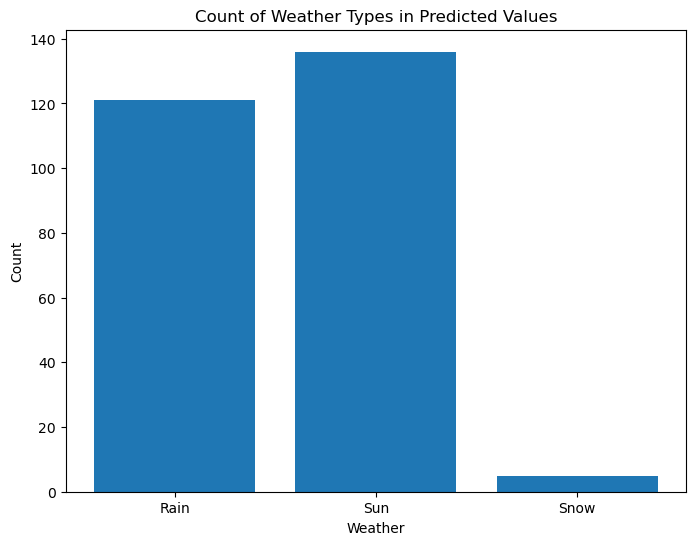

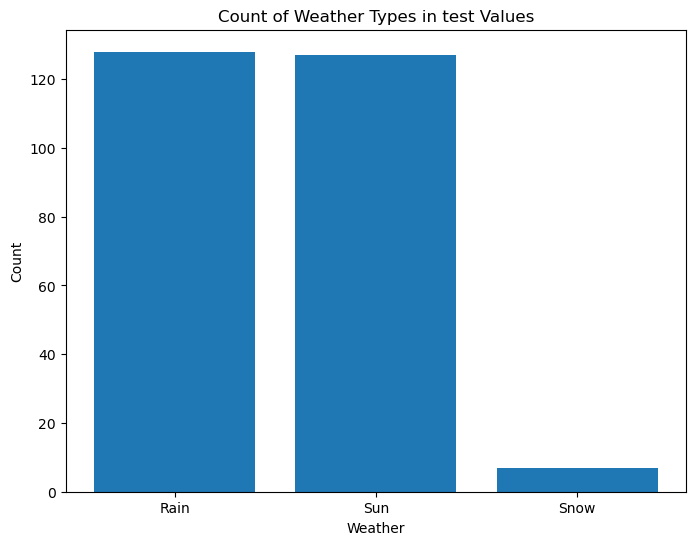

In [53]:
import matplotlib.pyplot as plt

# Replace these with the actual labels used in your dataset
weather_labels = {0: 'Rain', 1:  'Sun', 2: 'Snow'}

# Convert numeric predictions back to categorical labels
y_pred_labels = [weather_labels[pred] for pred in y_pred]

# Count occurrences of each weather type
count = {label: y_pred_labels.count(label) for label in weather_labels.values()}

# Create a bar plot to visualize the count of each weather type in y_pred
plt.figure(figsize=(8, 6))
plt.bar(count.keys(), count.values())
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Types in Predicted Values')
plt.show()



# Replace these with the actual labels used in your dataset


# Convert numeric predictions back to categorical labels
y_test_labels = [weather_labels[test] for test in y_test]

# Count occurrences of each weather type
count = {label: y_test_labels.count(label) for label in weather_labels.values()}

# Create a bar plot to visualize the count of each weather type in y_pred
plt.figure(figsize=(8, 6))
plt.bar(count.keys(), count.values())
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Types in test Values')
plt.show()



In [54]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

# Create Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000)  # You can adjust parameters like max_iter
logreg.fit(X_train2, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test2)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8320610687022901


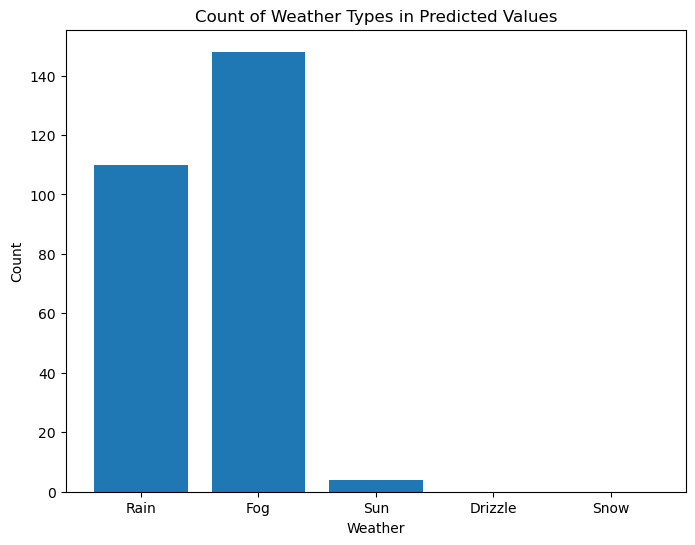

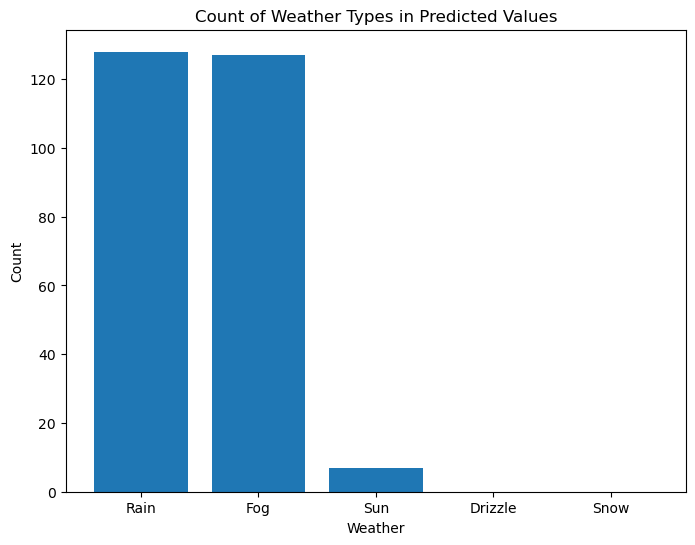

In [55]:
import matplotlib.pyplot as plt

# Replace these with the actual labels used in your dataset
weather_labels = {0: 'Rain', 1:  'Sun', 2: 'Snow'}

# Convert numeric predictions back to categorical labels
y_pred_labels = [weather_labels[pred] for pred in y_pred]

# Count occurrences of each weather type
count = {label: y_pred_labels.count(label) for label in weather_labels.values()}

# Create a bar plot to visualize the count of each weather type in y_pred
plt.figure(figsize=(8, 6))
plt.bar(count.keys(), count.values())
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Types in Predicted Values')
plt.show()



# Replace these with the actual labels used in your dataset


# Convert numeric predictions back to categorical labels
y_test_labels = [weather_labels[test] for test in y_test]

# Count occurrences of each weather type
count = {label: y_test_labels.count(label) for label in weather_labels.values()}

# Create a bar plot to visualize the count of each weather type in y_pred
plt.figure(figsize=(8, 6))
plt.bar(count.keys(), count.values())
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Types in Predicted Values')
plt.show()





In [122]:

y

0       3
1       0
2       0
3       0
4       0
       ..
1456    0
1457    0
1458    1
1459    2
1460    2
Name: weather, Length: 1461, dtype: int64

0.8054607508532423

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

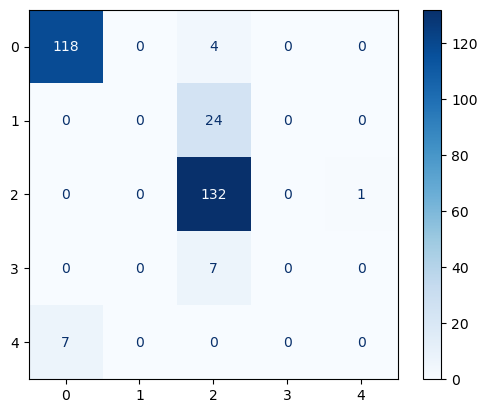

In [402]:
b=accuracy_score(y_test, y_predlr)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)




: 

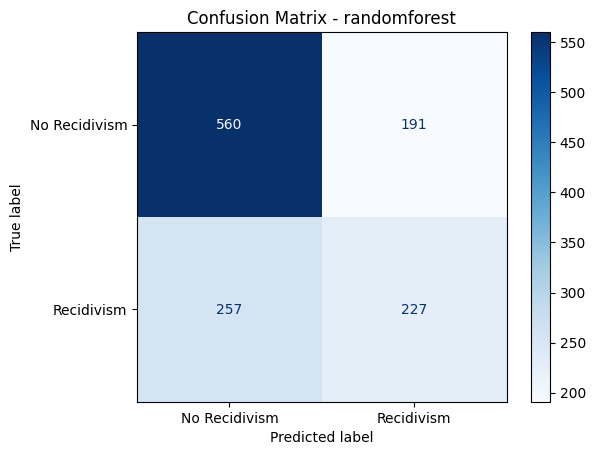

In [397]:
y_pred = rf.predict(X_test)

# Generating the confusion matrix
cm_nn = confusion_matrix(y_test, y_pred)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['No Recidivism', 'Recidivism'])
disp_nn.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - randomforest')
plt.show()

In [407]:
c=accuracy_score(y_test, y_pred)

0.6639676113360324

In [410]:
model_names = ['Sequential', 'Logistic Regression', 'randomforest']


accuracy_values = [a, b, c] 

In [411]:
accuracy_values

[0.6639676113360324, 0.6607287449392713, 0.637246963562753]

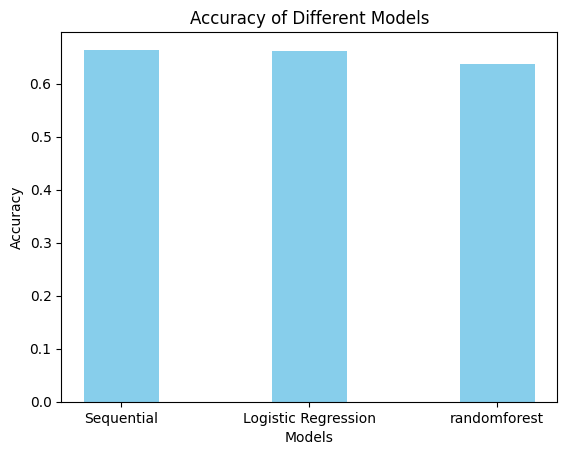

In [414]:
plt.bar(model_names, accuracy_values, color ='skyblue', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.show()

In [6]:
pip install tensorflow==2.2.1 

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.2.1


In [ ]:
pip install tensorflowjs

In [ ]:
from tensorflowjs import tfjs

# 4. Saving and Reloading

In [ ]:
model.save('tfmodel')

In [213]:
del model 

In [142]:
model = load_model('tfmodel')